## House Price Prediction

# Problem statement
To build a regression model for US based company Surparise Housing who have expanded thier market in Australia with help of regularisation in order to predict actual value of prospective properties and based on that they would take the decision weather they would invest in the properties or not.

# Business Goal :
A)Which variables are significant in predicting the price of a house, and

b)How well those variables describe the price of a house.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows=300
pd.options.display.max_columns=300

## Data Understanding and Pre-processing

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape
data.head()
data.columns

(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.isna().sum() / len(data)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.597260
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [5]:
# sns.barplot(data=data, x='Alley', y='SalePrice', estimator=np.median)

In [6]:
# fill known NA as per dictionary
data['Alley'].fillna('No alley access', inplace=True)
data['BsmtQual'].fillna('No Basement', inplace=True)
data['BsmtCond'].fillna('No Basement', inplace=True)
data['BsmtExposure'].fillna('No Basement', inplace=True)
data['BsmtFinType1'].fillna('No Basement', inplace=True)
data['BsmtFinType2'].fillna('No Basement', inplace=True)
data['FireplaceQu'].fillna('No Fireplace', inplace=True)
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageFinish'].fillna('No Garage', inplace=True)
data['GarageQual'].fillna('No Garage', inplace=True)
data['GarageCond'].fillna('No Garage', inplace=True)
data['PoolQC'].fillna('No Pool', inplace=True)
data['Fence'].fillna('No Fence', inplace=True)
data['MiscFeature'].fillna('None', inplace=True)

In [7]:
# impute other missing values
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['MasVnrType'].fillna('None', inplace=True)
data['MasVnrArea'].fillna(0.0, inplace=True) # fill value corresponding to MasVnrType=='None'
data['Electrical'].fillna(data['Electrical'].mode(), inplace=True)
data['GarageYrBlt'].fillna(9999, inplace=True) # fill dummy year value for No Garage

In [8]:
# data.isna().sum() / len(data)

`Id` variable has all unique values. So, we can ignore it as it does not add value to the model.

In [9]:
data.Id.nunique()

1460

In [10]:
# identify continous and categorical vars
continous_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
ordinal_vars = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 
                'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                'GarageCars', 'YrSold']
categorical_vars = [col for col in data.columns if col not in ['Id'] + continous_vars + ordinal_vars]

In [11]:
# fig, ax = plt.subplots(4, 5, figsize=[20, 20])
# for idx, col in enumerate(continous_vars):
#     sns.scatterplot(data=data, x=col, y='SalePrice', ax=ax[idx//5, idx%4])
# pass;

In [12]:
# check statistics
data[continous_vars].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


In [13]:
# check for outliers greater than 99th percentile
for col in continous_vars:
    df_outlier = data.loc[data[col] > np.percentile(data[col], 99)]
    print(f'{col}: {len(df_outlier)}')

LotFrontage: 15
LotArea: 15
MasVnrArea: 15
BsmtFinSF1: 15
BsmtFinSF2: 15
BsmtUnfSF: 15
TotalBsmtSF: 15
1stFlrSF: 15
2ndFlrSF: 15
LowQualFinSF: 14
GrLivArea: 15
GarageArea: 15
WoodDeckSF: 15
OpenPorchSF: 15
EnclosedPorch: 15
3SsnPorch: 13
ScreenPorch: 15
PoolArea: 7
MiscVal: 14
SalePrice: 15


In [14]:
# drop rows with values greater than 99th percentile
# for col in continous_vars:
#     data = data.loc[data[col] <= np.percentile(data[col], 99)]
    
# data.shape

<Axes: >

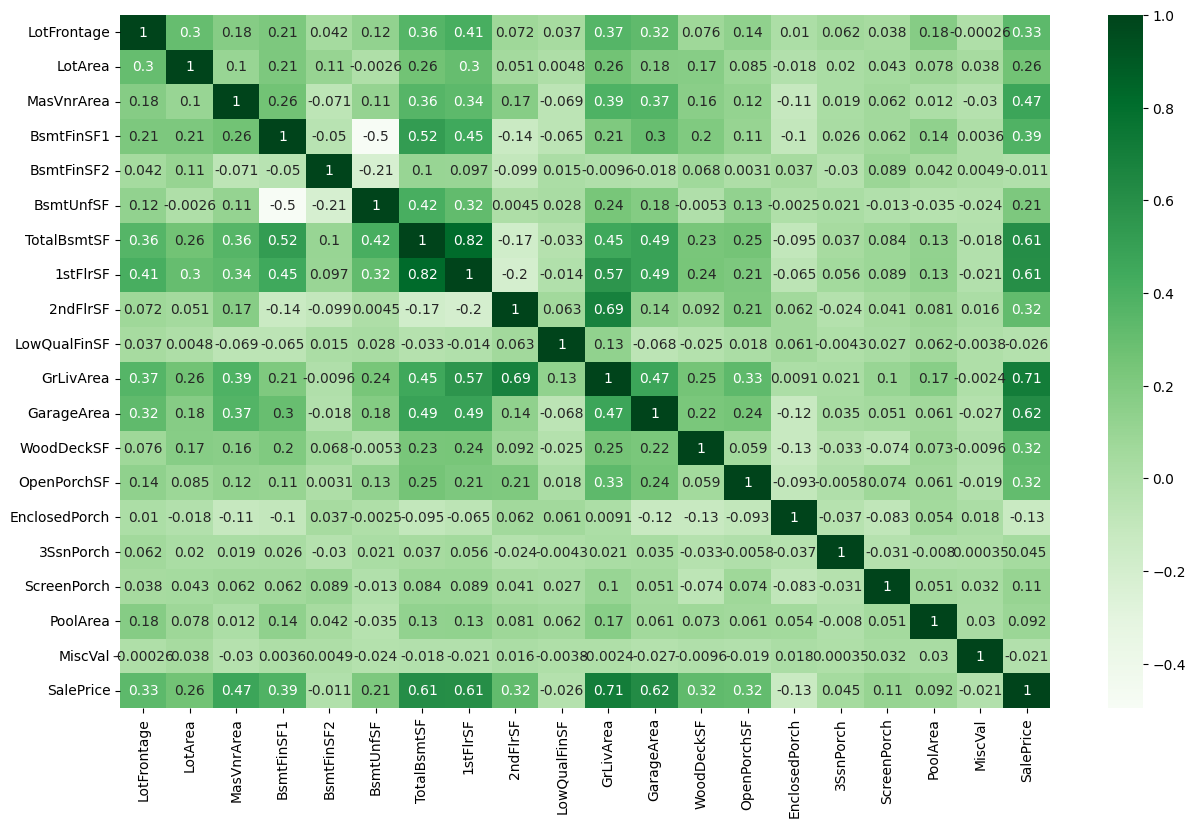

In [15]:
# check correlations
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(data[continous_vars].corr(), cmap='Greens', annot=True, ax=ax)

`TotalBsmtSF` and `1stFlrSF` are highly correlated. We may have to drop one of these.

In [16]:
# create copy
data_modeling = data.copy()

# convert categorical vars to one-hot
ohe_categorical_vars = []
categorical_vars_with_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
categorical_vars_without_na = [col for col in categorical_vars if col not in categorical_vars_with_na]

for col in categorical_vars_with_na:
    df_ohe = pd.get_dummies(data[col], prefix=col)
    ohe_categorical_vars.extend(df_ohe.columns)
    data_modeling = pd.concat([data_modeling, df_ohe], axis=1)

for col in categorical_vars_without_na:
    df_ohe = pd.get_dummies(data[col], prefix=col, drop_first=True)
    ohe_categorical_vars.extend(df_ohe.columns)
    data_modeling = pd.concat([data_modeling, df_ohe], axis=1)
    
# drop original cols
data_modeling.drop(categorical_vars, axis=1, inplace=True)

# drop redundant cols
redundant_cols = ['Alley_No alley access', 'BsmtQual_No Basement', 'BsmtCond_No Basement', 'BsmtExposure_No Basement', 
                  'BsmtFinType1_No Basement', 'BsmtFinType2_No Basement', 'FireplaceQu_No Fireplace', 'GarageType_No Garage', 
                  'GarageFinish_No Garage', 'GarageQual_No Garage', 'GarageCond_No Garage', 'PoolQC_No Pool', 'Fence_No Fence', 
                  'MiscFeature_None']
data_modeling.drop(redundant_cols, axis=1, inplace=True)

# drop id col
data_modeling.drop(['Id'], axis=1, inplace=True)

In [17]:
data_modeling.shape
data_modeling.head()

(1460, 291)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,Alley_Grvl,Alley_Pave,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,Ki

In [18]:
# split train test
df_train, df_test = train_test_split(data_modeling, test_size=0.2, random_state=123)

In [19]:
df_train.shape, df_test.shape

((1168, 291), (292, 291))

In [20]:
# scale data
# scaler = MinMaxScaler
scaler = StandardScaler()
scaler.fit(df_train[continous_vars])

df_train[continous_vars] = scaler.transform(df_train[continous_vars])
df_test[continous_vars] = scaler.transform(df_test[continous_vars])

StandardScaler()

## Modeling

In [21]:
target_vars = ['SalePrice']
feature_vars = [v for v in data_modeling.columns if v not in target_vars]

In [22]:
X_train, X_test, y_train, y_test = df_train[feature_vars], df_test[feature_vars], df_train[target_vars], df_test[target_vars]

In [23]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

### RFE

In [24]:
# # fit model
# model_skl = Ridge()
# model_skl.fit(X_train, y_train)

# # running RFE
# rfe = RFE(model_skl, n_features_to_select=15)
# rfe = rfe.fit(X_train, y_train)

# # RFE output
# pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_),
#              columns=['column', 'support', 'ranking'])

### VIF

In [25]:
# vif = pd.DataFrame()
# vif['Features'] = X_train.columns
# vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

### Add Polynomials

In [26]:
# degree = 2
# poly = PolynomialFeatures(degree)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

### Ridge Regression

In [27]:
# ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1
                       )            
model_cv.fit(X_train, y_train)
# model_cv.fit(X_train[X_train.columns[rfe.support_]], y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [28]:
# best hyperparameters
model_cv.best_params_

{'alpha': 20}

In [29]:
# fit Ridge model for best params
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# ridge.coef_

Ridge(alpha=40)

In [30]:
# most important variables
pd.DataFrame(zip(X_train.columns, ridge.coef_[0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(10)

,ColumnName,Coeff
140,Neighborhood_NridgHt,0.196971
139,Neighborhood_NoRidge,0.191746
34,BsmtQual_Ex,0.176424
22,GarageCars,0.156907
2,OverallQual,0.155709
14,GrLivArea,0.145358
146,Neighborhood_StoneBr,0.140115
43,BsmtExposure_Gd,0.131178
150,Condition1_Norm,0.125610
12,2ndFlrSF,0.105372


In [31]:
# calculate metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(rmse_train_lr)
metric2.append(rmse_train_lr)

rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse_test_lr)
metric2.append(rmse_test_lr)

0.8774556836102219
0.8894086455527588
143.1317615432608
31.48383363447037
0.3500633034035103
0.32836161173811823


### Lasso Regression

In [32]:
# lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
# best hyperparameters
model_cv.best_params_

{'alpha': 0.001}

In [34]:
# fit Ridge model for best params
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
# lasso.coef_

Lasso(alpha=0.002)

In [35]:
# most important variables
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(10).ColumnName.values

array(['Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'BsmtQual_Ex',
       'GrLivArea', 'KitchenAbvGr_1', 'Neighborhood_Crawfor',
       'BsmtExposure_Gd', 'Neighborhood_Somerst'], dtype=object)

In [36]:
# most important variables
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(10)

,ColumnName,Coeff
44,Neighborhood_NoRidge,0.498054
45,Neighborhood_NridgHt,0.465745
47,Neighborhood_StoneBr,0.456008
50,RoofMatl_WdShngl,0.362395
24,BsmtQual_Ex,0.305439
10,GrLivArea,0.299267
58,KitchenAbvGr_1,0.252219
43,Neighborhood_Crawfor,0.209006
27,BsmtExposure_Gd,0.206124
46,Neighborhood_Somerst,0.191470


In [37]:
# calculate metrics

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(rmse_train_lr)
metric3.append(rmse_train_lr)

rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse_test_lr)
metric3.append(rmse_test_lr)

0.8916106374467166
0.8913705374476846
2529313.253838149
149874.64704002967
0.3292253977950112
0.3254360092450073


In [38]:
# metrics table

lr_table = {
    'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)'], 
}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric['Ridge Regression'] = final_metric['Ridge Regression'].apply(lambda x: np.round(x, decimals=3))
final_metric['Lasso Regression'] = final_metric['Lasso Regression'].apply(lambda x: np.round(x, decimals=3))
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.877,0.892
1,R2 Score (Test),0.889,0.891
2,RSS (Train),143.132,2529313.254
3,RSS (Test),31.484,149874.647
4,RMSE (Train),0.350,0.329
5,RMSE (Test),0.328,0.325


### Residuals

#### Ridge

<Axes: ylabel='Density'>

<Axes: >

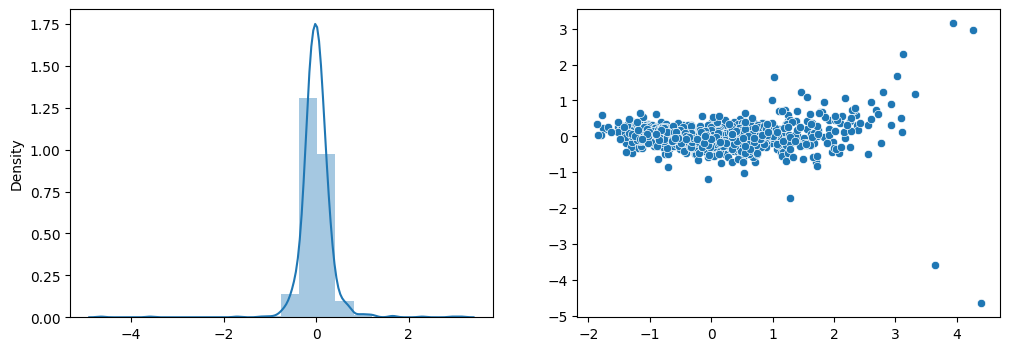

In [39]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

# check normality
y_train_pred = ridge.predict(X_train)
residuals = y_train.values - y_train_pred.reshape(-1, 1)
sns.distplot(residuals, bins = 20, ax=ax[0])

# check homoscedasticity
sns.scatterplot(x=y_train_pred.reshape(-1), y=residuals.reshape(-1), ax=ax[1])

<Axes: ylabel='Density'>

<Axes: >

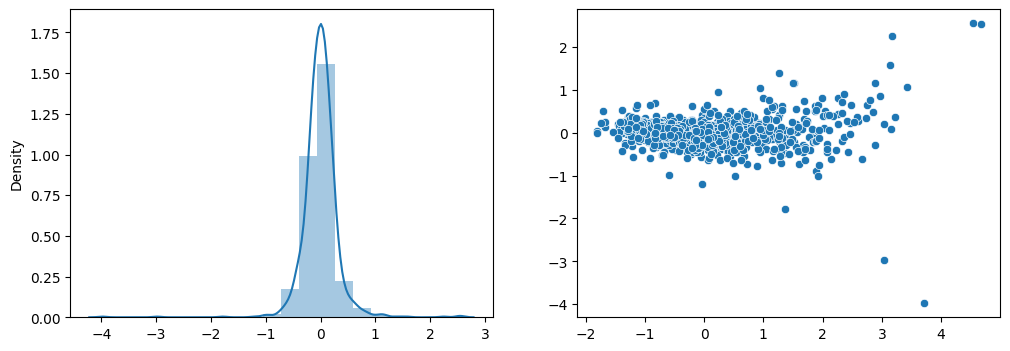

In [40]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

# check normality
y_train_pred = lasso.predict(X_train)
residuals = y_train.values - y_train_pred.reshape(-1, 1)
sns.distplot(residuals, bins = 20, ax=ax[0])

# check homoscedasticity
sns.scatterplot(x=y_train_pred.reshape(-1), y=residuals.reshape(-1), ax=ax[1])

Aside from a few outliers and a slight curve towards the right, all the variability seems to have been captured.

## Model Interpretation

In [41]:
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False)

,ColumnName,Coeff
44,Neighborhood_NoRidge,0.498054
45,Neighborhood_NridgHt,0.465745
47,Neighborhood_StoneBr,0.456008
50,RoofMatl_WdShngl,0.362395
24,BsmtQual_Ex,0.305439
10,GrLivArea,0.299267
58,KitchenAbvGr_1,0.252219
43,Neighborhood_Crawfor,0.209006
27,BsmtExposure_Gd,0.206124
46,Neighborhood_Somerst,0.191470


In [42]:
# print('cnt = \n' + ' + \n'.join([f'({round(coef, 2)} * {column})' for column, coef in zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0])]))

### Subjective Question 3

In [43]:
# lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# best hyperparameters
model_cv.best_params_

# drop top 5 most important features
top5_features = ['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'BsmtQual_Ex']
X_train.drop(top5_features, axis=1, inplace=True)
X_test.drop(top5_features, axis=1, inplace=True)

# fit Ridge model for best params
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
# lasso.coef_

# most important variables
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(5).ColumnName.values
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

{'alpha': 0.001}

Lasso(alpha=0.001)

array(['PoolQC_Ex', 'Street_Pave', 'GrLivArea', 'KitchenAbvGr_1',
       'Exterior2nd_ImStucc'], dtype=object)

,ColumnName,Coeff
36,PoolQC_Ex,0.683664
42,Street_Pave,0.326685
10,GrLivArea,0.316425
60,KitchenAbvGr_1,0.256109
56,Exterior2nd_ImStucc,0.233093
